**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.datasets import fetch_openml
from sklearn.metrics import pairwise_distances
%load_ext pycodestyle_magic

In [2]:


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):

        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):

        self.X = X
        self.y = y.astype(np.int32)
        self.n_classes = np.unique(y).shape[0]

        if (self.algorithm == 'kd_tree'):

            self.tree = KDTree(self.X)

        return self

    def predict(self, X):

        if (self.algorithm == 'brute'):
            dists = pairwise_distances(X, self.X, metric='euclidean')
            indexes = np.argpartition(
                                        dists,
                                        self.n_neighbors,
                                        axis=1)[:, :self.n_neighbors]

        elif (self.algorithm == 'kd_tree'):
            indexes = self.tree.query(X, self.n_neighbors,
                                      return_distance=False)

        else:
            raise AttributeError('Such method is not supported')

        classes = self.y[indexes]
        tmp = np.apply_along_axis(lambda x:
                                  np.bincount(x, minlength=self.n_classes),
                                  axis=1,
                                  arr=classes)
        res = np.argmax(tmp, axis=1)
        return res

    def predict_proba(self, X):

        if (self.algorithm == 'brute'):
            dists = pairwise_distances(X, self.X, metric='euclidean')
            indexes = np.argpartition(
                                        dists,
                                        self.n_neighbors,
                                        axis=1)[:, :self.n_neighbors]

        elif (self.algorithm == 'kd_tree'):
            indexes = self.tree.query(X,
                                      self.n_neighbors,
                                      return_distance=False)

        else:
            raise AttributeError('Such method is not supported')

        classes = self.y[indexes]
        votes = np.apply_along_axis(lambda x:
                                    np.bincount(x, minlength=self.n_classes),
                                    axis=1,
                                    arr=classes)
        return votes/self.n_neighbors

    def score(self, X, y):

        if (X.shape[0] != y.shape[0]):
            raise ValueError("Shapes of X and y should be equal!")

        res = self.predict(X) == y.astype(np.int32)
        return np.average(res)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.02 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 153 µs


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [8]:
%time clf.predict(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.26 ms


array([2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 79.1 ms


array([2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.48 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.42 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

In [14]:


max_neighbors = 30

n_tests = 50

my_scores = np.zeros((max_neighbors), dtype=np.float32)

for j, nn_num in enumerate(range(1, max_neighbors+1, 1)):

    my_clf = MyKNeighborsClassifier(n_neighbors=nn_num)

    my_total_score = 0

    for i in range(n_tests):

        X_train, X_test, y_train, y_test = train_test_split(
                                                        iris.data,
                                                        iris.target,
                                                        test_size=0.1,
                                                        stratify=iris.target)
        my_clf.fit(X_train, y_train)

        my_total_score += my_clf.score(X_test, y_test)

    my_scores[j] = my_total_score/n_tests

max acc:0.980000 n_neighbors:8


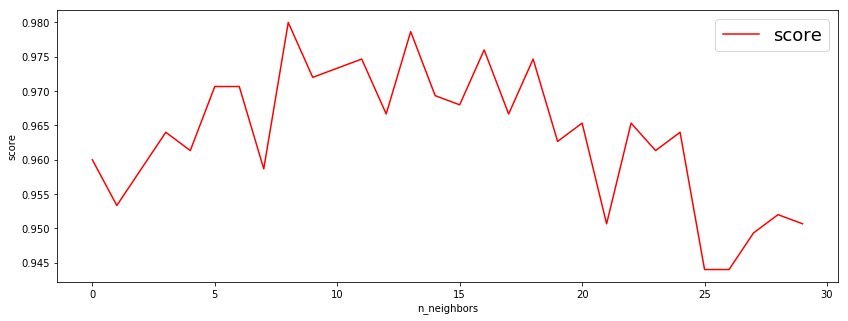

In [39]:

fig = plt.figure(figsize=(14, 5))
graph = plt.plot(np.arange(0, max_neighbors),
                 my_scores, color='r', label='score')
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.legend(fontsize=18)
print("max acc:%f n_neighbors:%d" % (np.max(my_scores), np.argmax(my_scores)))

**MNIST**

In [16]:
mnist = fetch_mldata('MNIST original')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [40]:
clf = KNeighborsClassifier(n_neighbors=8, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=8, algorithm='brute')

In [41]:
%time clf.fit(X_train, y_train)

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 13.2 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [42]:
%time my_clf.fit(X_train, y_train)

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 8.03 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=8)

In [43]:
%time clf.predict(X_test)

CPU times: user 14.1 s, sys: 1.37 s, total: 15.5 s
Wall time: 5.92 s


array([5., 6., 5., 5., 4., 7., 8., 4., 8., 7., 5., 1., 7., 0., 6., 8., 8.,
       9., 7., 9., 5., 1., 1., 6., 6., 8., 5., 3., 5., 2., 1., 5., 1., 9.,
       0., 4., 7., 8., 7., 1., 0., 8., 7., 4., 9., 3., 1., 4., 5., 4., 0.,
       0., 9., 6., 9., 2., 4., 1., 6., 1., 7., 0., 5., 7., 2., 3., 1., 2.,
       4., 0., 9., 1., 2., 1., 0., 1., 1., 0., 6., 6., 6., 3., 7., 7., 2.,
       3., 0., 9., 8., 8., 7., 1., 5., 8., 1., 8., 5., 2., 3., 1., 1., 7.,
       2., 9., 1., 6., 2., 7., 7., 6., 3., 9., 3., 7., 4., 0., 9., 3., 0.,
       8., 5., 0., 3., 0., 8., 1., 4., 0., 0., 3., 2., 3., 6., 9., 1., 8.,
       9., 1., 4., 3., 3., 4., 3., 8., 1., 3., 3., 5., 8., 4., 8., 8., 7.,
       2., 9., 7., 8., 5., 3., 9., 8., 5., 7., 5., 2., 4., 0., 3., 4., 1.,
       0., 9., 7., 1., 7., 0., 0., 2., 7., 4., 5., 9., 9., 1., 6., 8., 8.,
       9., 5., 9., 6., 0., 7., 4., 6., 7., 5., 1., 2., 8., 7., 1., 4., 8.,
       6., 1., 0., 9., 0., 9., 9., 5., 1., 3., 3., 0., 9., 1., 2., 1., 7.,
       7., 8., 7., 9., 9.

In [44]:
%time my_clf.predict(X_test)

CPU times: user 14.7 s, sys: 1.75 s, total: 16.4 s
Wall time: 6.21 s


array([5, 6, 5, 5, 4, 7, 8, 4, 8, 7, 5, 1, 7, 0, 6, 8, 8, 9, 7, 9, 5, 1,
       1, 6, 6, 8, 5, 3, 5, 2, 1, 5, 1, 9, 0, 4, 7, 8, 7, 1, 0, 8, 7, 4,
       9, 3, 1, 4, 5, 4, 0, 0, 9, 6, 9, 2, 4, 1, 6, 1, 7, 0, 5, 7, 2, 3,
       1, 2, 4, 0, 9, 1, 2, 1, 0, 1, 1, 0, 6, 6, 6, 3, 7, 7, 2, 3, 0, 9,
       8, 8, 7, 1, 5, 8, 1, 8, 5, 2, 3, 1, 1, 7, 2, 9, 1, 6, 2, 7, 7, 6,
       3, 9, 3, 7, 4, 0, 9, 3, 0, 8, 5, 0, 3, 0, 8, 1, 4, 0, 0, 3, 2, 3,
       6, 9, 1, 8, 9, 1, 4, 3, 3, 4, 3, 8, 1, 3, 3, 5, 8, 4, 8, 8, 7, 2,
       9, 7, 8, 5, 3, 9, 8, 5, 7, 5, 2, 4, 0, 3, 4, 1, 0, 9, 7, 1, 7, 0,
       0, 2, 7, 4, 5, 9, 9, 1, 6, 8, 8, 9, 5, 9, 6, 0, 7, 4, 6, 7, 5, 1,
       2, 8, 7, 1, 4, 8, 6, 1, 0, 9, 0, 9, 9, 5, 1, 3, 3, 0, 9, 1, 2, 1,
       7, 7, 8, 7, 9, 9, 3, 8, 1, 1, 6, 7, 1, 3, 0, 0, 3, 6, 9, 9, 4, 9,
       6, 0, 6, 2, 5, 1, 1, 8, 5, 8, 7, 1, 9, 8, 6, 0, 4, 1, 7, 5, 8, 9,
       7, 6, 5, 6, 3, 3, 6, 5, 4, 2, 8, 4, 3, 7, 2, 3, 4, 2, 5, 4, 2, 9,
       1, 9, 2, 3, 7, 2, 3, 6, 6, 2, 4, 5, 1, 4, 7,

In [45]:
%time clf.predict_proba(X_test)

CPU times: user 15 s, sys: 1.35 s, total: 16.4 s
Wall time: 5.91 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [46]:
%time my_clf.predict_proba(X_test)

CPU times: user 14.2 s, sys: 1.46 s, total: 15.6 s
Wall time: 5.98 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [47]:
clf.score(X_test, y_test)

0.9685714285714285

In [48]:
my_clf.score(X_test, y_test)

0.9685714285714285

Задание 4

In [27]:
clf = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=8, algorithm='kd_tree')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data,
                                                    mnist.target,
                                                    test_size=0.01,
                                                    stratify=mnist.target)

In [29]:
%time clf.fit(X_train, y_train)

CPU times: user 1min 19s, sys: 544 ms, total: 1min 19s
Wall time: 1min 19s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [30]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1min 16s, sys: 524 ms, total: 1min 16s
Wall time: 1min 16s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [31]:
%time clf.predict(X_test)

CPU times: user 2min 28s, sys: 100 ms, total: 2min 28s
Wall time: 2min 28s


array([5., 6., 5., 5., 4., 7., 8., 4., 8., 2., 5., 1., 7., 0., 6., 8., 8.,
       9., 7., 9., 5., 1., 1., 6., 6., 8., 5., 3., 5., 2., 1., 5., 1., 9.,
       0., 4., 7., 8., 7., 1., 0., 8., 7., 4., 9., 3., 1., 4., 5., 4., 0.,
       0., 9., 6., 9., 2., 4., 1., 6., 1., 2., 0., 5., 7., 2., 3., 1., 2.,
       4., 0., 9., 1., 2., 1., 0., 1., 1., 0., 6., 6., 6., 3., 7., 7., 2.,
       3., 0., 9., 8., 8., 7., 1., 5., 8., 1., 8., 5., 2., 3., 1., 1., 7.,
       2., 9., 1., 6., 2., 7., 7., 6., 3., 9., 3., 7., 4., 0., 9., 3., 0.,
       8., 5., 0., 3., 0., 8., 1., 4., 0., 0., 3., 2., 3., 6., 9., 1., 8.,
       9., 1., 4., 3., 3., 4., 3., 8., 1., 3., 3., 5., 8., 4., 8., 8., 7.,
       2., 9., 7., 8., 5., 3., 9., 8., 5., 7., 3., 2., 4., 0., 3., 4., 1.,
       0., 9., 7., 1., 7., 0., 0., 2., 7., 4., 5., 4., 9., 1., 6., 8., 8.,
       9., 5., 9., 6., 0., 7., 4., 6., 8., 5., 1., 2., 8., 7., 4., 4., 8.,
       6., 1., 0., 9., 0., 9., 9., 5., 1., 3., 3., 0., 9., 1., 2., 1., 7.,
       7., 8., 7., 9., 9.

In [32]:
%time my_clf.predict(X_test)

CPU times: user 2min 1s, sys: 48 ms, total: 2min 1s
Wall time: 2min 1s


array([5, 6, 5, 5, 4, 7, 8, 4, 8, 2, 5, 1, 7, 0, 6, 8, 8, 9, 7, 9, 5, 1,
       1, 6, 6, 8, 5, 3, 5, 2, 1, 5, 1, 9, 0, 4, 7, 8, 7, 1, 0, 8, 7, 4,
       9, 3, 1, 4, 5, 4, 0, 0, 9, 6, 9, 2, 4, 1, 6, 1, 2, 0, 5, 7, 2, 3,
       1, 2, 4, 0, 9, 1, 2, 1, 0, 1, 1, 0, 6, 6, 6, 3, 7, 7, 2, 3, 0, 9,
       8, 8, 7, 1, 5, 8, 1, 8, 5, 2, 3, 1, 1, 7, 2, 9, 1, 6, 2, 7, 7, 6,
       3, 9, 3, 7, 4, 0, 9, 3, 0, 8, 5, 0, 3, 0, 8, 1, 4, 0, 0, 3, 2, 3,
       6, 9, 1, 8, 9, 1, 4, 3, 3, 4, 3, 8, 1, 3, 3, 5, 8, 4, 8, 8, 7, 2,
       9, 7, 8, 5, 3, 9, 8, 5, 7, 3, 2, 4, 0, 3, 4, 1, 0, 9, 7, 1, 7, 0,
       0, 2, 7, 4, 5, 4, 9, 1, 6, 8, 8, 9, 5, 9, 6, 0, 7, 4, 6, 8, 5, 1,
       2, 8, 7, 4, 4, 8, 6, 1, 0, 9, 0, 9, 9, 5, 1, 3, 3, 0, 9, 1, 2, 1,
       7, 7, 8, 7, 9, 9, 3, 3, 1, 1, 6, 7, 1, 3, 0, 0, 3, 6, 9, 9, 4, 9,
       6, 0, 6, 2, 5, 1, 1, 3, 5, 8, 7, 1, 9, 2, 6, 0, 4, 1, 7, 5, 8, 9,
       7, 6, 5, 6, 3, 3, 6, 5, 4, 2, 8, 4, 3, 7, 2, 3, 4, 2, 5, 4, 2, 9,
       1, 9, 2, 3, 7, 2, 3, 6, 6, 2, 4, 5, 1, 4, 7,

In [33]:
%time clf.predict_proba(X_test)

CPU times: user 2min 30s, sys: 80 ms, total: 2min 30s
Wall time: 2min 31s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [34]:
%time my_clf.predict_proba(X_test)

CPU times: user 2min, sys: 4 ms, total: 2min
Wall time: 2min


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [35]:
clf.score(X_test, y_test)

0.9628571428571429

In [36]:
my_clf.score(X_test, y_test)

0.9628571428571429

Задание 5

In [38]:
# seaborn  -- библиотека для визуализации  данных  и статистик
# matplotlib -- библиотека для визуализации данных и постороения графиков
# train_test_split -- sklearn функция разделения выборки и лейблов на тестирующую и обучающую выборки
# Pipeline() (from sklearn.pipeline import Pipeline) -- это объект, реализующий существующий алгоритм ml.
# Т.е. он выполняет последовательность  различных преобразований исходного набора данных до 
# применения окончательной оценки.
#%load_ext e -- загрузка расширения e 
# StandardScaler (from sklearn.preprocessing import StandardScaler)  -- класс,используемый при 
#  препроцессинге, нормализация - центрирование + шкалирование  т.е. вычитаем среднее и делим
#  на стандартное отклонение )  
# ClassifierMixin -- родительский класс(примесь) почти всех классификаторов, используемый для вычисления score
# NeighborsBase  -- родительский класс(примесь) для KNN классификатора , в котором реализованы подсчёт метрики,
# обучение, проверка корректности алгоритма поиска
# KNeighborsMixin -- родительский класс для классификатора KNN, в котором реализованы
# алгоритмы поиска ближайших соседей
# SupervisedIntegerMixin -- класс (примесь) ,вызывающий fit метод для KNN и проверяющая его работоспособность   